## 1. Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## 2. Load the Dataset

In [ ]:
#upload the bank dataset to Colab

#from google.colab import files
#uploaded = files.upload()

print("1. Loading the dataset...")
bank_data = pd.read_csv("bank.csv")
print("Done")

1. Loading the dataset...
Done


## 3. Data Exploration
Exploratory Data Analysis (EDA) to understand the dataset's structure, features, and target variable.
### 3.1 Display the First Few Rows



In [ ]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(bank_data.head())

First 5 rows of the dataset:
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [ ]:
# Check the number of rows and columns
print("\nDataset shape:", bank_data.shape)



Dataset shape: (11162, 17)


In [ ]:
# Check column names and data types
print("\nColumn information:")
print(bank_data.info())


Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


In [ ]:
# Check for missing values
print("\nMissing values per column:")
print(bank_data.isnull().sum())


Missing values per column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [ ]:
#Summary statistics
print("\nSummary statistics for numerical columns:")
print(bank_data.describe())


Summary statistics for numerical columns:
                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.00

In [ ]:
#Target variable distribution
print("\nTarget variable distribution:")
print(bank_data['deposit'].value_counts())
print(bank_data['deposit'].value_counts(normalize=True) * 100)


Target variable distribution:
deposit
no     5873
yes    5289
Name: count, dtype: int64
deposit
no     52.616019
yes    47.383981
Name: proportion, dtype: float64


## 4. Data Visualization
Visualizing the dataset to gain insights into feature distributions and relationships with the target variable.


--- Data Visualization ---


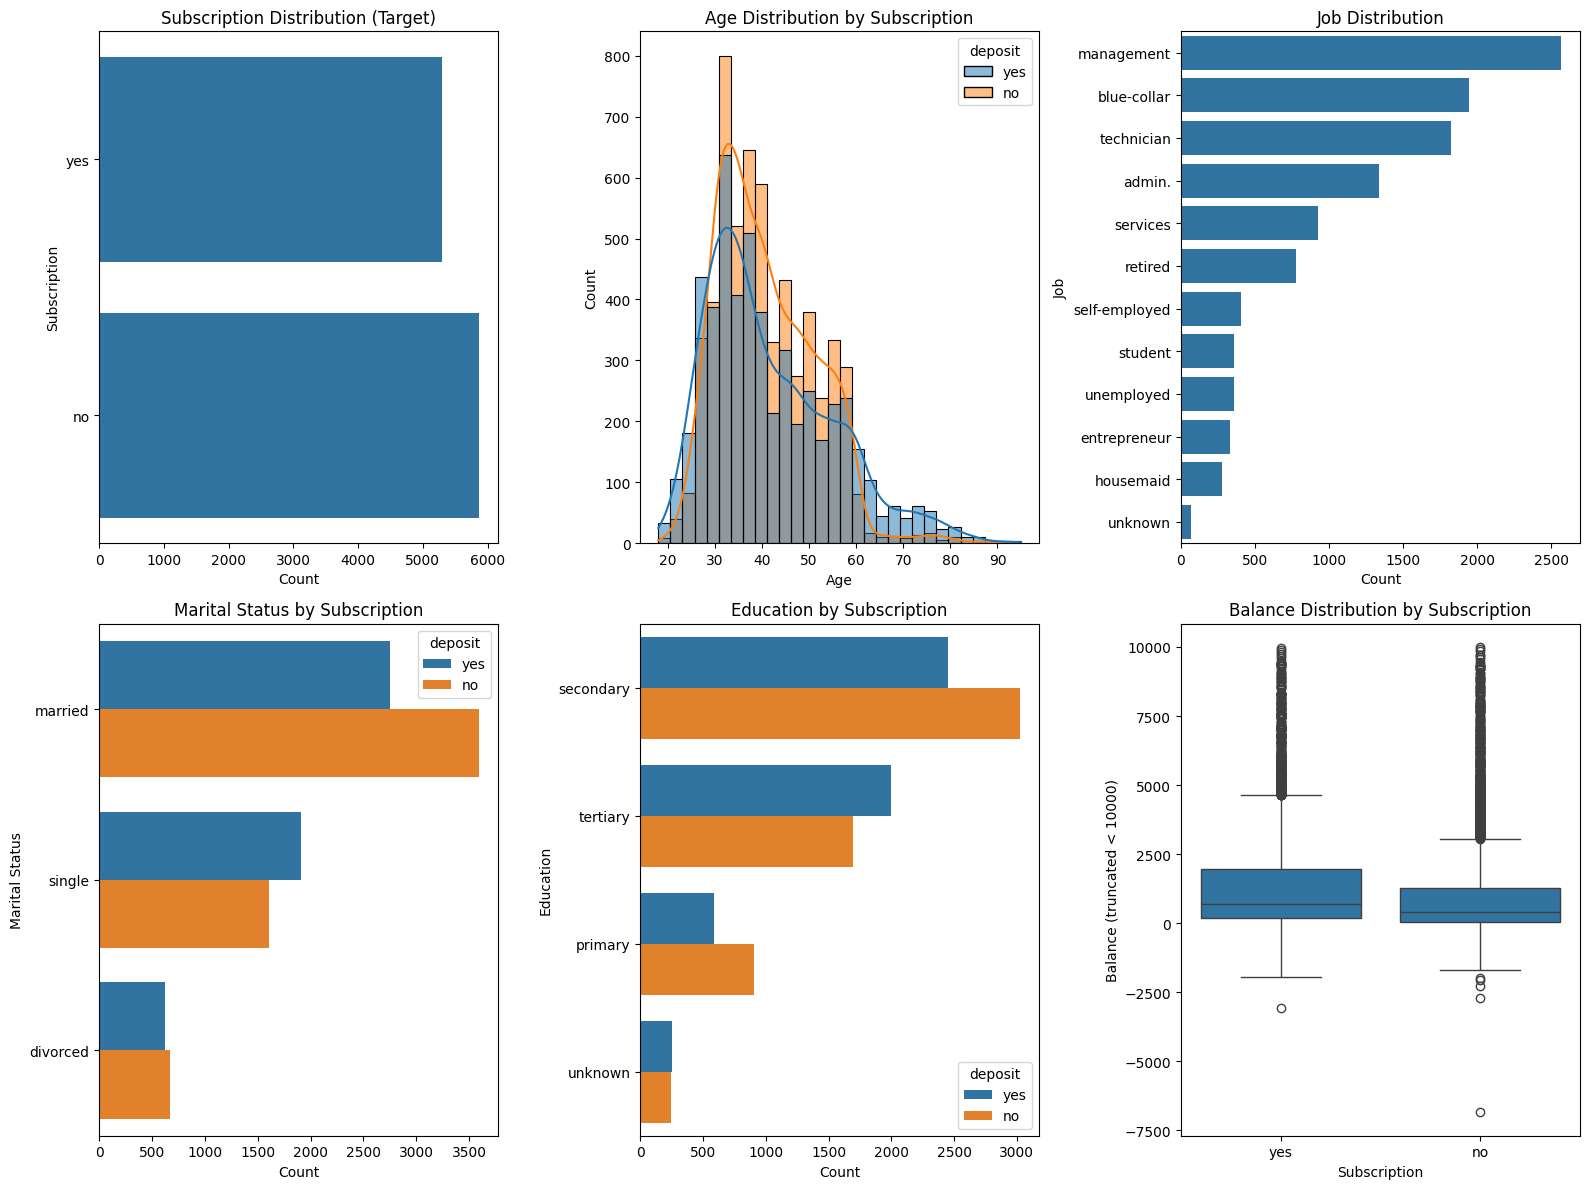

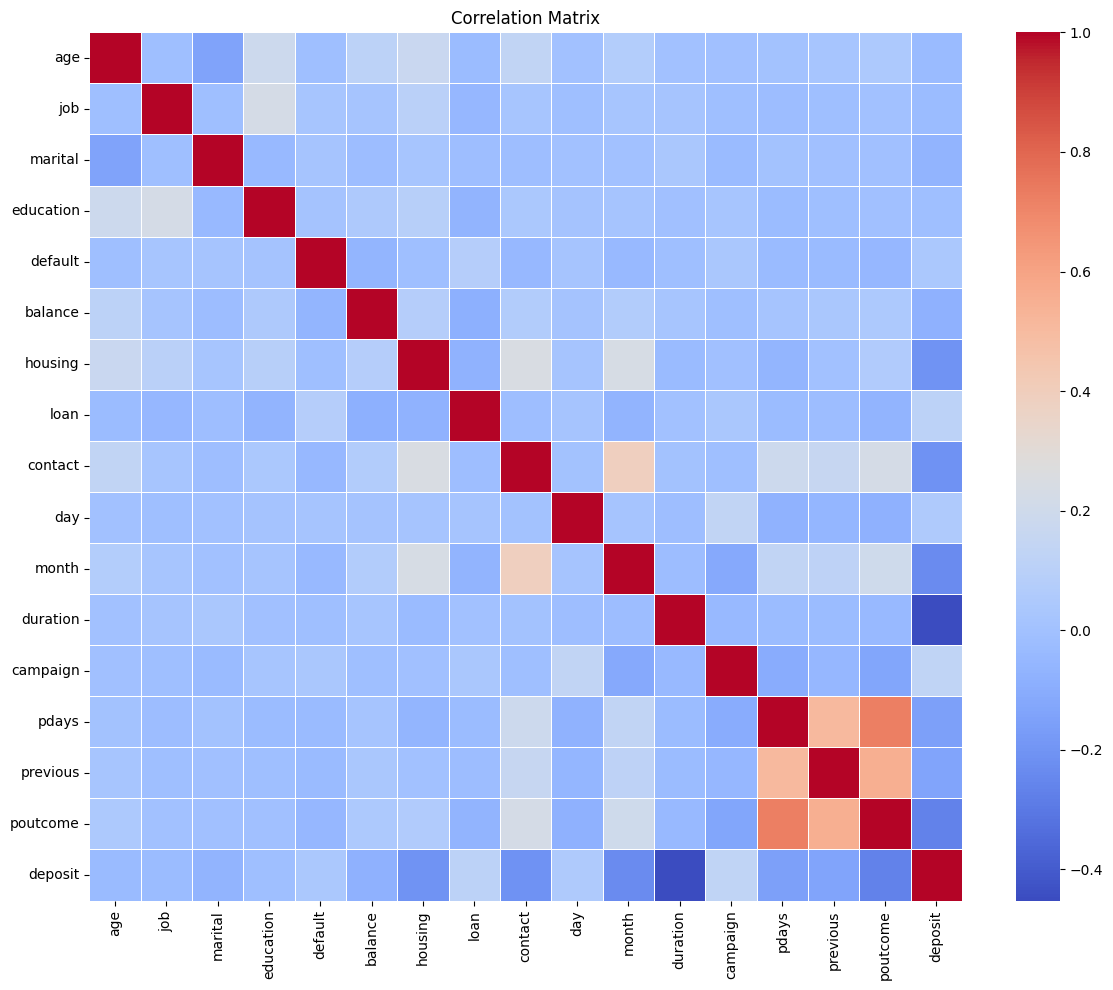

In [ ]:
print("\n--- Data Visualization ---")

# Set up the plotting environment
plt.figure(figsize=(16, 12))

# 3.1 Target variable distribution
plt.subplot(2, 3, 1)
sns.countplot(y='deposit', data=bank_data)
plt.title('Subscription Distribution (Target)')
plt.xlabel('Count')
plt.ylabel('Subscription')

# 3.2 Age distribution by target
plt.subplot(2, 3, 2)
sns.histplot(data=bank_data, x='age', hue='deposit', kde=True, bins=30)
plt.title('Age Distribution by Subscription')
plt.xlabel('Age')

# 3.3 Job distribution
plt.subplot(2, 3, 3)
job_counts = bank_data['job'].value_counts()
sns.barplot(y=job_counts.index, x=job_counts.values)
plt.title('Job Distribution')
plt.xlabel('Count')
plt.ylabel('Job')

# 3.4 Marital status by target
plt.subplot(2, 3, 4)
sns.countplot(y='marital', hue='deposit', data=bank_data)
plt.title('Marital Status by Subscription')
plt.xlabel('Count')
plt.ylabel('Marital Status')

# 3.5 Education by target
plt.subplot(2, 3, 5)
sns.countplot(y='education', hue='deposit', data=bank_data)
plt.title('Education by Subscription')
plt.xlabel('Count')
plt.ylabel('Education')

# 3.6 Balance distribution by target (truncated for visualization)
plt.subplot(2, 3, 6)
bank_data_trunc = bank_data[bank_data['balance'] < 10000]  # Truncate for better visualization
sns.boxplot(x='deposit', y='balance', data=bank_data_trunc)
plt.title('Balance Distribution by Subscription')
plt.xlabel('Subscription')
plt.ylabel('Balance (truncated < 10000)')

plt.tight_layout()
plt.show()

# Additional visualizations - Correlations between features
plt.figure(figsize=(12, 10))
# Convert categorical variables to numeric for correlation analysis
bank_data_numeric = bank_data.copy()
categorical_cols = bank_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    bank_data_numeric[col] = pd.factorize(bank_data[col])[0]

# Calculate correlation matrix
corr_matrix = bank_data_numeric.corr()
# Plot heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## 5. Data Preprocessing for ID3
Preprocessing steps to prepare the data for modeling.



In [ ]:
print("\n--- Data Preprocessing ---")

# Make a copy of the data to avoid modifying the original dataset
data = bank_data.copy()


--- Data Preprocessing ---


### Identify Categorical and Numerical Columns

In [ ]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('deposit')  # Remove target from features list

## 6. Split into Training and Testing Sets

In [ ]:
X = data.drop('deposit', axis=1)
y = data['deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)

## Data Preprocessing Pipeline

## 8. Build and Evaluate the ID3 Model

In [ ]:
# Identify categorical features for one-hot encoding
categorical_features = [col for col in X.columns if col in categorical_cols]

# Define preprocessing: OneHotEncoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keeps numerical columns as they are
)

# Create a pipeline with ID3 decision tree (using entropy criterion)
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        criterion='entropy',
        max_depth=5,
        min_samples_split=10,  # Require at least 10 samples to split a node
        min_samples_leaf=5     # Require at least 5 samples in each leaf node
    ))
])

# Fit model
print("Training the ID3 model...")
clf.fit(X_train, y_train)

Training the ID3 model...


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=5,
                                        min_samples_split=10))])

## 8. Model Evaluation

In [ ]:
print("\n--- Model Evaluation ---")
predictions = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

# Generate and print confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, predictions)
print(cm)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))


--- Model Evaluation ---
Accuracy: 0.8110

Confusion Matrix:
[[936 210]
 [212 875]]

Classification Report:
              precision    recall  f1-score   support

          no       0.82      0.82      0.82      1146
         yes       0.81      0.80      0.81      1087

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



## 9. Extract and display feature importance

In [ ]:

print("\n--- Feature Importance ---")

# Get feature names after one-hot encoding
ohe = clf.named_steps['preprocessor'].transformers_[0][1]
categorical_feature_names = []
for i, category in enumerate(categorical_features):
    categorical_feature_names.extend([f"{category}_{val}" for val in ohe.categories_[i]])

# Get names of numerical features
numerical_features = [col for col in X.columns if col not in categorical_features]

# Combine all feature names in the correct order
feature_names = categorical_feature_names + numerical_features

# Get feature importances from the classifier
importances = clf.named_steps['classifier'].feature_importances_

# Create a dataframe of feature importance and sort it
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print(feature_importance_df.head(10))


--- Feature Importance ---
             Feature  Importance
47          duration    0.587888
42  poutcome_success    0.164034
27   contact_unknown    0.121824
36         month_may    0.039242
22       housing_yes    0.031468
35         month_mar    0.026468
38         month_oct    0.008995
25  contact_cellular    0.008959
13   marital_married    0.004239
31         month_feb    0.002729


## 10. Visualize the Decision Tree


--- Decision Tree Visualization ---


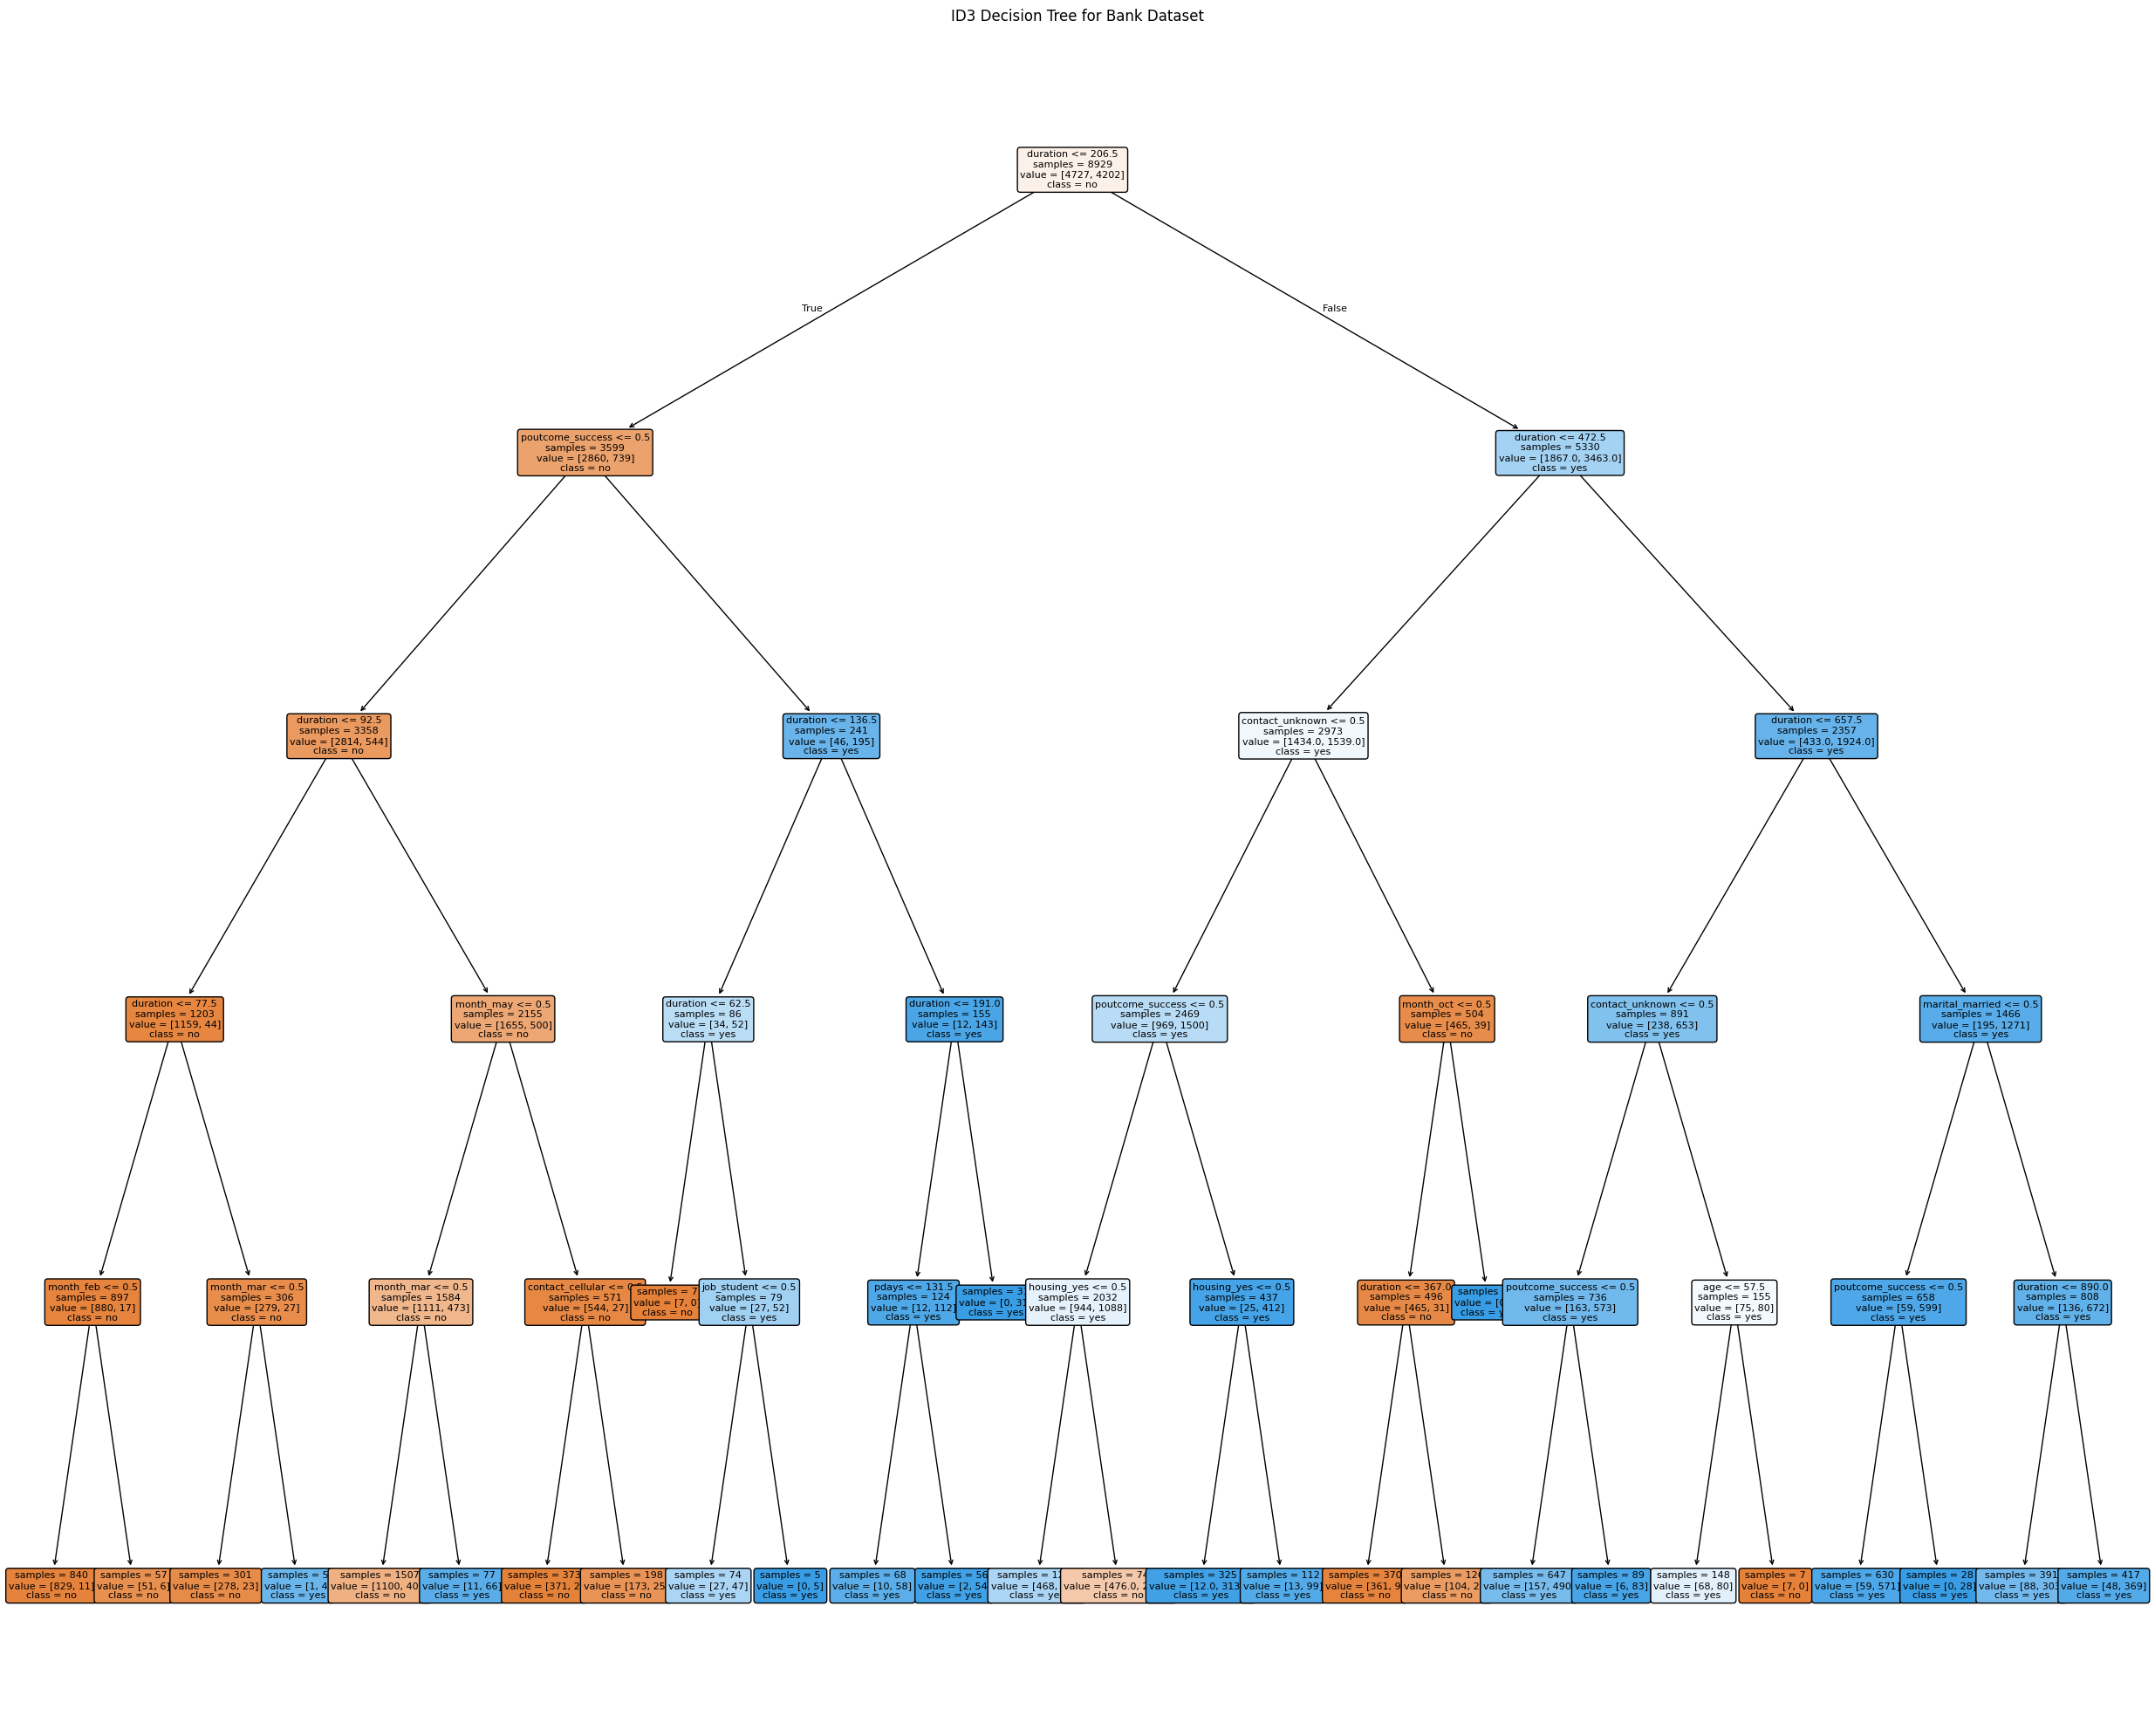

In [ ]:
print("\n--- Decision Tree Visualization ---")

# Access the trained decision tree from the pipeline
decision_tree = clf.named_steps['classifier']

# Visualize the tree
plt.figure(figsize=(25, 20))
plot_tree(decision_tree, feature_names=feature_names, class_names=['no', 'yes'],
          filled=True, rounded=True, fontsize=8,
          proportion=False,  # Don't show proportions
          impurity=False)    # Don't show impurity values
plt.title('ID3 Decision Tree for Bank Dataset')
plt.tight_layout()
plt.show()

# Save the figure if needed
# plt.savefig('id3_decision_tree.png', dpi=300, bbox_inches='tight')

# 14. Summary
Summarize the findings, including model accuracy, key insights, and feature importance.